In [71]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt

In [72]:
csv = pd.read_csv("Indian Liver Patient Dataset (ILPD).csv",header=None)

In [73]:
csv.columns=["Age",'Gender','Tb_Bilirubin','DB_Bilirubin','Alkaline_Phosphotase','Sgpt ','Sgot','Protiens','Albumin','Albumin_Globulin','Disease']

#Missing Values
csv.info()
csv.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   583 non-null    int64  
 1   Gender                583 non-null    object 
 2   Tb_Bilirubin          583 non-null    float64
 3   DB_Bilirubin          583 non-null    float64
 4   Alkaline_Phosphotase  583 non-null    int64  
 5   Sgpt                  583 non-null    int64  
 6   Sgot                  583 non-null    int64  
 7   Protiens              583 non-null    float64
 8   Albumin               583 non-null    float64
 9   Albumin_Globulin      579 non-null    float64
 10  Disease               583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


Age                     0
Gender                  0
Tb_Bilirubin            0
DB_Bilirubin            0
Alkaline_Phosphotase    0
Sgpt                    0
Sgot                    0
Protiens                0
Albumin                 0
Albumin_Globulin        4
Disease                 0
dtype: int64

In [74]:
csv['Albumin_Globulin'] = csv['Albumin_Globulin'].fillna(csv['Albumin_Globulin'].mean())
csv.info()
csv.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   583 non-null    int64  
 1   Gender                583 non-null    object 
 2   Tb_Bilirubin          583 non-null    float64
 3   DB_Bilirubin          583 non-null    float64
 4   Alkaline_Phosphotase  583 non-null    int64  
 5   Sgpt                  583 non-null    int64  
 6   Sgot                  583 non-null    int64  
 7   Protiens              583 non-null    float64
 8   Albumin               583 non-null    float64
 9   Albumin_Globulin      583 non-null    float64
 10  Disease               583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


Age                     0
Gender                  0
Tb_Bilirubin            0
DB_Bilirubin            0
Alkaline_Phosphotase    0
Sgpt                    0
Sgot                    0
Protiens                0
Albumin                 0
Albumin_Globulin        0
Disease                 0
dtype: int64

In [75]:
#replace Gender female with 1 and Male with 0
for i in csv['Gender']:
    if i=='Female':
        csv = csv.replace('Female',1)
    else:
        csv =csv.replace('Male',0)
        

In [76]:
csv


,Age,Gender,Tb_Bilirubin,DB_Bilirubin,Alkaline_Phosphotase,Sgpt,Sgot,Protiens,Albumin,Albumin_Globulin,Disease
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,0,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,0,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,0,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,0,1.3,0.5,184,29,32,6.8,3.4,1.00,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7be0762340>,
      dtype=object)

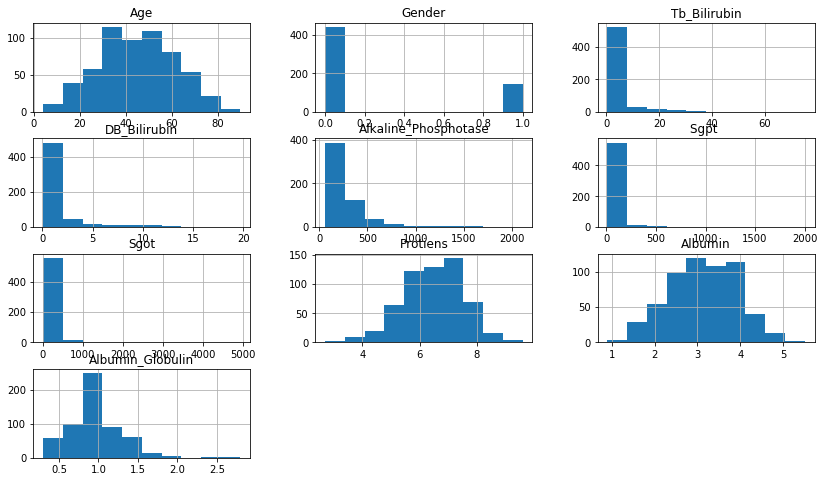

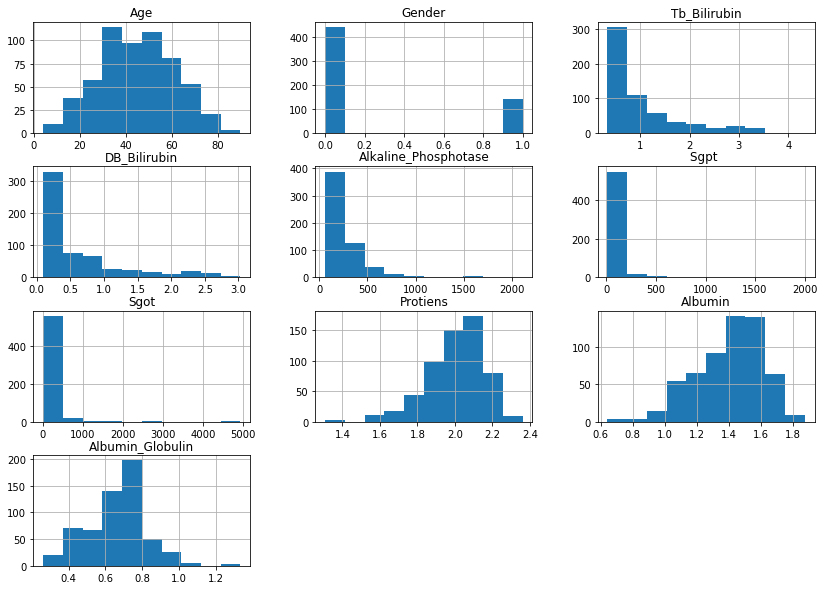

In [77]:
#Create Input && output data 
X_data = csv.drop('Disease',axis=1)
Y_data = csv['Disease']

# Visualize skewed continuous features of original data

X_data.hist(figsize=(14,8))


# Skewed features are Albumin, Direct Bilirubin, A/G ratio, Tota Bilirubin, Total Protein 
#Log-transform the skewed features
skewed = ['Albumin', 'DB_Bilirubin', 'Tb_Bilirubin', 'Albumin_Globulin', 'Protiens']
X_data[skewed] = X_data[skewed].apply(lambda x: np.log(x + 1))
X_data[skewed] = X_data[skewed]
# Visualize the new log distributions
X_data.hist(figsize=(14,10))

In [78]:
# : One-hot encode the data using pandas.get_dummies()
features = pd.get_dummies(X_data)

encoded = list(features.columns)
print ("{} total features after one-hot encoding.".format(len(encoded)))
print (encoded)

disease=pd.get_dummies(Y_data)
encoded = list(disease.columns)
print ("{} disease columns after one-hot encoding.".format(len(encoded)))
print (disease[1])


10 total features after one-hot encoding.
['Age', 'Gender', 'Tb_Bilirubin', 'DB_Bilirubin', 'Alkaline_Phosphotase', 'Sgpt ', 'Sgot', 'Protiens', 'Albumin', 'Albumin_Globulin']
2 disease columns after one-hot encoding.
0      1
1      1
2      1
3      1
4      1
      ..
578    0
579    1
580    1
581    1
582    0
Name: 1, Length: 583, dtype: uint8


In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras

#split dataset to train and test data 
X_train,X_test,Y_train,Y_test =train_test_split(X_data,Y_data,test_size=0.2,random_state=None)

def preprocessing(X_train,Y_train,X_test,Y_test,type="MinMax"):

            #NORMALIZATION#
    if type == "Normalization":
        X_train_normalized = tf.keras.utils.normalize(X_train)
        X_test_normalized = tf.keras.utils.normalize(X_test)
        return X_train_normalized,Y_train,X_test_normalized,Y_test

            #NORM-WITH MINMAX#
    elif type == "MinMax":
        scaler = MinMaxScaler(feature_range=(-1, 1))
        X_train_minmax = scaler.fit_transform(X_train)
        X_test_minmax = scaler.fit_transform(X_test)
        return X_train_minmax , Y_train ,X_test_minmax ,Y_test

X_train_minmax,Y_train,X_test_minmax,Y_test=preprocessing(X_train,Y_train,X_test,Y_test,type="MinMax")
print(X_train_minmax.shape,X_test_minmax.shape,Y_train.shape,Y_test.shape)


(466, 10) (117, 10) (466,) (117,)


In [80]:
#Function to perform 5 Folds Cross-Validation
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
kf = KFold(n_splits=5)


def cross_validation(model, _X, _y, _cv=kf):
     #_X array input values
     #_Y out labels
     #cv Determines the number of folds for cross-validation.
     
      _scoring = ['accuracy', 'precision', 'recall', 'f1']

      #Model Training and validation
      results = cross_validate(estimator=model, X=_X,y=_y,cv=kf,scoring=_scoring,return_train_score=True,verbose=1)
      #Elegxoume tin apododsi pou petuxenei me ta test dedomena pou eginan split apo to kfold
      y_pred = cross_val_predict(model, X_train_minmax,  Y_train, cv=5)
      #pairnoume to accuracy 
      accuracy = accuracy_score(Y_train, y_pred)
      #Geometric mean score
      geom_mean_score=geometric_mean_score(Y_train, y_pred)

      print(classification_report(Y_train,y_pred))
      #info
      return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean(),
              "geometric_mean_score":geom_mean_score,
              "Test_accuracy_score":accuracy,
              "Y_pred":y_pred
      }


In [81]:
from sklearn.metrics import accuracy_score
#'Function to plot a grouped bar chart showing the training and validation results of the ML model in each fold after applying K-fold cross-validation.
def plot_result(x_label, y_label, plot_title, X_train, Y_train,geometric_data):
   #x_label name algorithm
   #y_label: str, Name of metric being visualized e.g 'Accuracy'

        
        # Set size of plot
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis+0.0, X_train, 0.2, color='blue', label='Training')
        plt.bar(X_axis+0.2, Y_train, 0.2, color='red', label='Validation')
        plt.bar(X_axis+0.4, geometric_data, 0.2, color='black', label='Geometric')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()


In [82]:
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import classification_report
#MODEL for Naive Bayes
gnb = GaussianNB()
kf = KFold(n_splits=5)

#decision__result with callback functon
results= cross_validation(gnb, X_train_minmax, Y_train, kf)

#MEAN 
Training_acc=results["Mean Training Accuracy"]
Validation_Acc=results["Mean Validation Accuracy"]

#PREDICTION ACCURACY WITH X_TEST && Y_TEST
pred_accuracy=results['Test_accuracy_score']
pred_accuracy
#Geometric Mean score
Geom =results['geometric_mean_score']
print(f'TRAINING ACCURACY :{Training_acc}'"\n",f'VALIDATION ACCURACY :{Validation_Acc}'"\n",f'PREDICTION ACCURACY WITH TEST DATA:{pred_accuracy}'"\n",F'GEOMETRIC_MEAN_SCORE:{Geom}')


              precision    recall  f1-score   support

           1       0.94      0.49      0.64       329
           2       0.43      0.93      0.59       137

    accuracy                           0.62       466
   macro avg       0.69      0.71      0.62       466
weighted avg       0.79      0.62      0.63       466

TRAINING ACCURACY :61.91083628816051
 VALIDATION ACCURACY :62.67673301304049
 PREDICTION ACCURACY WITH TEST DATA:0.6180257510729614
 GEOMETRIC_MEAN_SCORE:0.6735294127620319


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


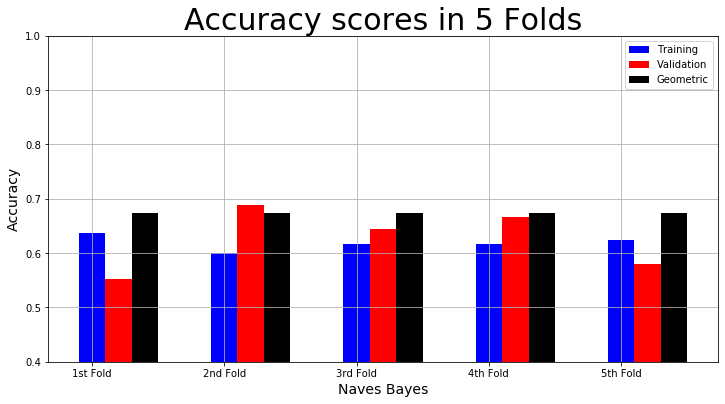

In [83]:
#PLOT NAVE BAYES 
model_name = "Naves Bayes"

plot_result(model_name,"Accuracy","Accuracy scores in 5 Folds",results["Training Accuracy scores"],results["Validation Accuracy scores"],results['geometric_mean_score'])



In [84]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

C=np.arange(1.0,205,5).tolist()

#Hyperparameter C calculation
kernels=['linear']
param_grid = {'C': C,'kernel': kernels}

#input normalization data 
'''X_train_minmax'''
#target output
'''Y_train'''
svc = svm.SVC()
#svc.cv_results_.keys()
for kernel in kernels:
  #svc = svm.SVC(kernel=kernel).fit(X, y)
  #plotSVC(‘kernel=’ + str(kernel))
  grid = GridSearchCV(svc,param_grid,refit=True,cv=5,verbose=1)
  grid.fit(X_train_minmax,Y_train)
print(grid.best_score_,grid.best_params_)
#print(grid.cv_results_)
#print(grid.cv_results_.keys())
#print("Training Accuracy scores:",grid.cv_results_['mean_train_score'].mean()*100)
print("Testing Accuracy scores:",grid.cv_results_['mean_test_score'].mean()*100)



Fitting 5 folds for each of 41 candidates, totalling 205 fits
0.7060169297643561 {'C': 1.0, 'kernel': 'linear'}
Testing Accuracy scores: 70.60169297643561


In [85]:
#Gamma me step 0.5 sto diastima 10
gamma=np.arange(0.5, 10.5, 0.5).tolist()
kernels=['rbf']
param_grid = {'C':[31.0] ,'gamma':gamma,'kernel': kernels}

for kernel in kernels:
  #svc = svm.SVC(kernel=kernel).fit(X, y)
  #plotSVC(‘kernel=’ + str(kernel))
  grid = GridSearchCV(svc,param_grid,refit=True,cv=5,verbose=1)
  grid.fit(X_train_minmax,Y_train)
print(grid.best_score_,grid.best_params_)
#print(grid.cv_results_)
#print(grid.cv_results_.keys())
#print("Training Accuracy scores:",grid.cv_results_['mean_train_score'].mean()*100)
print("Testing Accuracy scores:",grid.cv_results_['mean_test_score'].mean()*100)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
0.7125371768474034 {'C': 31.0, 'gamma': 10.0, 'kernel': 'rbf'}
Testing Accuracy scores: 68.83905284831846


In [86]:
#SVM MODEL WITH BEST PARAMETERS


#MODEL for SVM
svc = svm.SVC(kernel='rbf',C=31.0,gamma=3.0)
kf = KFold(n_splits=5)

#decision__result with callback functon
results= cross_validation(svc, X_train_minmax, Y_train, kf)

#MEAN 
Training_acc=results["Mean Training Accuracy"]
Validation_Acc=results["Mean Validation Accuracy"]

#PREDICTION ACCURACY WITH X_TEST && Y_TEST
pred_accuracy=results['Test_accuracy_score']
pred_accuracy
#Geometric Mean score
Geom =results['geometric_mean_score']
geom_list=[Geom]*5

print(f'TRAINING ACCURACY :{Training_acc}'"\n",f'VALIDATION ACCURACY :{Validation_Acc}'"\n",f'PREDICTION ACCURACY WITH TEST DATA:{pred_accuracy}'"\n",F'GEOMETRIC_MEAN_SCORE:{Geom}')


              precision    recall  f1-score   support

           1       0.78      0.78      0.78       329
           2       0.47      0.46      0.46       137

    accuracy                           0.69       466
   macro avg       0.62      0.62      0.62       466
weighted avg       0.69      0.69      0.69       466

TRAINING ACCURACY :94.09870564155783
 VALIDATION ACCURACY :66.74673987645848
 PREDICTION ACCURACY WITH TEST DATA:0.6866952789699571
 GEOMETRIC_MEAN_SCORE:0.5993473698635754


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


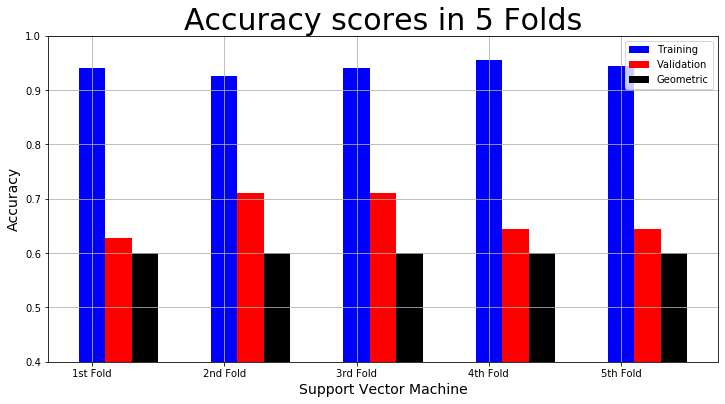

In [87]:
#PLOT SVM
model_name = "Support Vector Machine"

plot_result(model_name,"Accuracy","Accuracy scores in 5 Folds",results["Training Accuracy scores"],results["Validation Accuracy scores"],results['geometric_mean_score'])



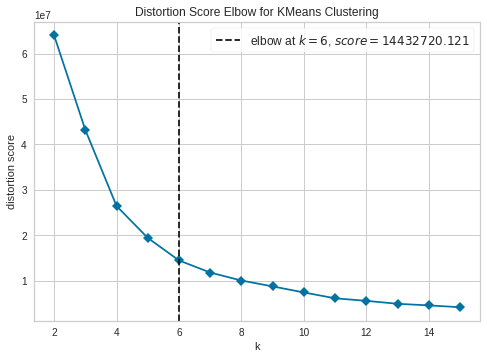

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f7bdc6190a0>,
                 estimator=KMeans(n_clusters=15, random_state=1), k=(2, 16),
                 timings=False)

In [88]:
#Kmeans
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer

#find best K parameter
kelbow_visualizer(KMeans(random_state=1),X_data,k=(2, 16),timings=False)

In [89]:
from sklearn.metrics import silhouette_score

range_n_clusters = list (range(3,16))
print ("Number of clusters from 3 to 15: \n", range_n_clusters)

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X_data)
    centers = clusterer.cluster_centers_
    score = silhouette_score (X_data, preds)
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))


Number of clusters from 3 to 15: 
 [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
For n_clusters = 3, silhouette score is 0.7304543945942013)
For n_clusters = 4, silhouette score is 0.7391287633122963)
For n_clusters = 5, silhouette score is 0.6569971930547717)
For n_clusters = 6, silhouette score is 0.6786697449200669)
For n_clusters = 7, silhouette score is 0.6780671236669034)
For n_clusters = 8, silhouette score is 0.5772762961304053)
For n_clusters = 9, silhouette score is 0.5749438280860245)
For n_clusters = 10, silhouette score is 0.45596532358470354)
For n_clusters = 11, silhouette score is 0.4570892331832789)
For n_clusters = 12, silhouette score is 0.458496314335464)
For n_clusters = 13, silhouette score is 0.4718845670514693)
For n_clusters = 14, silhouette score is 0.46182289114997516)
For n_clusters = 15, silhouette score is 0.41707661011647956)
